In [95]:
import csv
import json
import requests
import pprint

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
data = pd.read_csv('sortby_MAC_Time.csv', header=[0,1], index_col=0)

C:\Users\gmldn\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
dic = {}
for col1, col2 in data.columns:
    if col1!= 'l1':
        dic[col1] = ''
        strs = col1.split('.')
        dic[col1] = strs[0]

data.rename(columns = dic, inplace = True)

In [11]:
data

l1               AP                     \
0             l2       IP Address        MAC Address   
1        4408787   172.20.120.113  00:c8:8b:21:ae:80   
2        3451965    172.20.146.92  08:17:35:c7:5c:50   
3        4980360   164.125.10.205  44:e4:d9:85:2d:a0   
4        4487815   172.20.119.131  cc:16:7e:3e:10:40   
5        2456894  164.125.110.239  44:e4:d9:3f:ba:b0   
6        4487814   172.20.119.131  cc:16:7e:3e:10:40   
7        6805312   172.20.107.133  84:3d:c6:e6:52:e0   
8        7821343   172.20.179.133  28:6f:7f:d8:d6:90   
9        4153394  164.125.136.230  10:8c:cf:11:96:40   
10        459471  164.125.168.248  10:8c:cf:10:8d:a0   
11         21181  164.125.175.247  84:3d:c6:ea:62:40   
12        459472  164.125.168.248  10:8c:cf:10:8d:a0   
13       6684810   172.20.157.113  00:62:ec:b7:75:e0   
14       5988729   172.20.138.131  00:62:ec:b7:82:80   
15         21182  164.125.175.247  84:3d:c6:ea:62:40   
16       5958668   172.20.138.111  00:62:ec:b7:81:c0   
17       1260666  164.125.184.252  44:e4:d9:40:c7:b0   
18       7615086   164.125.76.252  28:c7:ce:4f:b3:d0   
19       6676827   172.20.157.111  00:62:ec:c0:80:20   
20       6684811   172.20.157.113  00:62:ec:b7:75:e0   
21       6684812   172.20.157.113  00:62:ec:b7:75:e0   
22       6676828   172.20.157.111  00:62:ec:c0:80:20   
23       2731581   172.20.158.143  44:e4:d9:84:16:20   
24       4313933    172.20.151.92  10:8c:cf:11:32:00   
25         26466  164.125.168.235  84:3d:c6:eb:a9:a0   
26       7806236   172.20.179.127  28:6f:7f:8b:ea:00   
27       7907593   172.20.162.111  44:e4:d9:84:8f:b0   
28       7673947   164.125.92.238  08:17:35:c7:5a:b0   
29       4153057  164.125.136.230  10:8c:cf:11:96:40   
30       6701780   172.20.157.123  44:e4:d9:bc:1d:30   
31       6728701  164.125.143.234  10:8c:cf:11:28:b0   
32       7074774   164.125.66.237  10:8c:cf:10:dd:e0   
33       1260296  164.125.184.252  44:e4:d9:40:c7:b0   
34       4544209   172.20.119.141  44:e4:d9:85:91:80   
35         21183  164.125.175.247  84:3d:c6:ea:62:40   
36       7047898   164.125.66.236  44:e4:d9:84:30:50   
37       4629922    172.20.119.91  08:17:35:c7:f7:80   
38       4598022   172.20.119.151  cc:16:7e:25:c8:c0   
39       4446116   172.20.119.122  00:62:ec:e6:4f:90   
40       6936544   172.20.110.112  00:62:ec:e6:35:90   
41       1260297  164.125.184.252  44:e4:d9:40:c7:b0   
42         55643  164.125.168.237  84:3d:c6:e7:ca:f0   
43       7758423  164.125.184.251  44:e4:d9:84:c7:b0   
44       6685046   172.20.157.113  00:62:ec:b7:75:e0   
45       4544208   172.20.119.141  44:e4:d9:85:91:80   
46       7047899   164.125.66.236  44:e4:d9:84:30:50   
47       6684813   172.20.157.113  00:62:ec:b7:75:e0   
48       6684814   172.20.157.113  00:62:ec:b7:75:e0   
49       5433178   172.20.112.133  00:62:ec:f6:9d:c0   
50       5068365   164.125.10.246  10:8c:cf:11:47:80   
...          ...              ...                ...   
9775513  9760644   172.20.180.154  50:0f:80:3d:e0:50   
9775514  9761145   172.20.180.154  50:0f:80:3d:e0:50   
9775515  9761146   172.20.180.154  50:0f:80:3d:e0:50   
9775516  9761604   172.20.180.154  50:0f:80:3d:e0:50   
9775517  9761394   172.20.180.154  50:0f:80:3d:e0:50   
9775518  9761605   172.20.180.154  50:0f:80:3d:e0:50   
9775519  9761606   172.20.180.154  50:0f:80:3d:e0:50   
9775520  9761395   172.20.180.154  50:0f:80:3d:e0:50   
9775521  9761396   172.20.180.154  50:0f:80:3d:e0:50   
9775522  9761757   172.20.180.155  40:01:7a:a9:22:60   
9775523  9762230   172.20.180.155  40:01:7a:a9:22:60   
9775524  9762231   172.20.180.155  40:01:7a:a9:22:60   
9775525  9762724   172.20.180.155  40:01:7a:a9:22:60   
9775526  9763986   172.20.180.156  40:01:7a:cc:35:20   
9775527  9767093   172.20.180.157  50:0f:80:3d:e8:60   
9775528  9767484   172.20.180.157  50:0f:80:3d:e8:60   
9775529  9764836   172.20.180.156  40:01:7a:cc:35:20   
9775530  9767133   172.20.180.157  50:0f:80:3d:e8:60   
9775531  9765189   172.20.180.156  40:

In [4]:
access = data[[('AP','Map Location'), ('Client','MAC Address'),('Client','Endpoint Type'), ('Disassociation Time','Unnamed: 23_level_1' ),('Association Time', 'Unnamed: 24_level_1')]]

In [5]:
access = data[data[('AP','Map Location')].str.startswith('Pusan')]
access

l1               AP                     \
0             l2       IP Address        MAC Address   
1        4408787   172.20.120.113  00:c8:8b:21:ae:80   
3        4980360   164.125.10.205  44:e4:d9:85:2d:a0   
4        4487815   172.20.119.131  cc:16:7e:3e:10:40   
5        2456894  164.125.110.239  44:e4:d9:3f:ba:b0   
6        4487814   172.20.119.131  cc:16:7e:3e:10:40   
7        6805312   172.20.107.133  84:3d:c6:e6:52:e0   
8        7821343   172.20.179.133  28:6f:7f:d8:d6:90   
11         21181  164.125.175.247  84:3d:c6:ea:62:40   
13       6684810   172.20.157.113  00:62:ec:b7:75:e0   
14       5988729   172.20.138.131  00:62:ec:b7:82:80   
15         21182  164.125.175.247  84:3d:c6:ea:62:40   
16       5958668   172.20.138.111  00:62:ec:b7:81:c0   
17       1260666  164.125.184.252  44:e4:d9:40:c7:b0   
19       6676827   172.20.157.111  00:62:ec:c0:80:20   
20       6684811   172.20.157.113  00:62:ec:b7:75:e0   
21       6684812   172.20.157.113  00:62:ec:b7:75:e0   
22       6676828   172.20.157.111  00:62:ec:c0:80:20   
23       2731581   172.20.158.143  44:e4:d9:84:16:20   
25         26466  164.125.168.235  84:3d:c6:eb:a9:a0   
26       7806236   172.20.179.127  28:6f:7f:8b:ea:00   
27       7907593   172.20.162.111  44:e4:d9:84:8f:b0   
30       6701780   172.20.157.123  44:e4:d9:bc:1d:30   
33       1260296  164.125.184.252  44:e4:d9:40:c7:b0   
34       4544209   172.20.119.141  44:e4:d9:85:91:80   
35         21183  164.125.175.247  84:3d:c6:ea:62:40   
36       7047898   164.125.66.236  44:e4:d9:84:30:50   
38       4598022   172.20.119.151  cc:16:7e:25:c8:c0   
39       4446116   172.20.119.122  00:62:ec:e6:4f:90   
40       6936544   172.20.110.112  00:62:ec:e6:35:90   
41       1260297  164.125.184.252  44:e4:d9:40:c7:b0   
42         55643  164.125.168.237  84:3d:c6:e7:ca:f0   
43       7758423  164.125.184.251  44:e4:d9:84:c7:b0   
44       6685046   172.20.157.113  00:62:ec:b7:75:e0   
45       4544208   172.20.119.141  44:e4:d9:85:91:80   
46       7047899   164.125.66.236  44:e4:d9:84:30:50   
47       6684813   172.20.157.113  00:62:ec:b7:75:e0   
48       6684814   172.20.157.113  00:62:ec:b7:75:e0   
49       5433178   172.20.112.133  00:62:ec:f6:9d:c0   
51       5759665   164.125.10.237  44:e4:d9:40:d3:b0   
52       5759666   164.125.10.237  44:e4:d9:40:d3:b0   
53       2968902  164.125.168.242  44:e4:d9:bc:08:00   
54       7051550   172.20.110.152  00:62:ec:fa:a9:70   
57       6976412   164.125.66.233  44:e4:d9:84:c8:b0   
58       1260667  164.125.184.252  44:e4:d9:40:c7:b0   
59       4382625   172.20.119.114  a0:e0:af:e3:ef:e0   
60          5670  164.125.168.231  84:3d:c6:d1:ef:90   
61       8336704  164.125.153.242  44:e4:d9:40:13:50   
62       5743584   164.125.10.236  44:e4:d9:85:8a:30   
67         13235  164.125.169.247  a0:e0:af:d1:e0:80   
69       4544210   172.20.119.141  44:e4:d9:85:91:80   
...          ...              ...                ...   
9204162  8353557  164.125.153.249  44:e4:d9:40:d3:d0   
9204163  8360784  164.125.153.249  44:e4:d9:40:d3:d0   
9204164  8360552  164.125.153.249  44:e4:d9:40:d3:d0   
9204165  8369222  164.125.153.250  44:e4:d9:84:ad:60   
9204166  8369223  164.125.153.250  44:e4:d9:84:ad:60   
9204167  8363438  164.125.153.250  44:e4:d9:84:ad:60   
9204168  8354414  164.125.153.249  44:e4:d9:40:d3:d0   
9204169  8354415  164.125.153.249  44:e4:d9:40:d3:d0   
9204170  8354416  164.125.153.249  44:e4:d9:40:d3:d0   
9204171  8354483  164.125.153.249  44:e4:d9:40:d3:d0   
9204172  8356105  164.125.153.249  44:e4:d9:40:d3:d0   
9204173  8356104  164.125.153.249  44:e4:d9:40:d3:d0   
9204179  8369012  164.125.153.250  44:e4:d9:84:ad:60   
9204180  8360851  164.125.153.249  44:e4:d9:40:d3:d0   
9204242  8362163  164.125.153.249  44:e4:d9:40:d3:d0   
9204243  8363027  164.125.153.250  44:e4:d9:84:ad:60   
9204244  8363028  164.125.153.250  44:e4:d9:84:ad:60   
9204245  8364604  164.125.153.250  44:e4:d9:84:ad:60   
9204246  8364605  164.125.153.250  44:

In [187]:
data_df = access
data_df

l1               AP                     \
0             l2       IP Address        MAC Address   
1        4408787   172.20.120.113  00:c8:8b:21:ae:80   
3        4980360   164.125.10.205  44:e4:d9:85:2d:a0   
4        4487815   172.20.119.131  cc:16:7e:3e:10:40   
5        2456894  164.125.110.239  44:e4:d9:3f:ba:b0   
6        4487814   172.20.119.131  cc:16:7e:3e:10:40   
7        6805312   172.20.107.133  84:3d:c6:e6:52:e0   
8        7821343   172.20.179.133  28:6f:7f:d8:d6:90   
11         21181  164.125.175.247  84:3d:c6:ea:62:40   
13       6684810   172.20.157.113  00:62:ec:b7:75:e0   
14       5988729   172.20.138.131  00:62:ec:b7:82:80   
15         21182  164.125.175.247  84:3d:c6:ea:62:40   
16       5958668   172.20.138.111  00:62:ec:b7:81:c0   
17       1260666  164.125.184.252  44:e4:d9:40:c7:b0   
19       6676827   172.20.157.111  00:62:ec:c0:80:20   
20       6684811   172.20.157.113  00:62:ec:b7:75:e0   
21       6684812   172.20.157.113  00:62:ec:b7:75:e0   
22       6676828   172.20.157.111  00:62:ec:c0:80:20   
23       2731581   172.20.158.143  44:e4:d9:84:16:20   
25         26466  164.125.168.235  84:3d:c6:eb:a9:a0   
26       7806236   172.20.179.127  28:6f:7f:8b:ea:00   
27       7907593   172.20.162.111  44:e4:d9:84:8f:b0   
30       6701780   172.20.157.123  44:e4:d9:bc:1d:30   
33       1260296  164.125.184.252  44:e4:d9:40:c7:b0   
34       4544209   172.20.119.141  44:e4:d9:85:91:80   
35         21183  164.125.175.247  84:3d:c6:ea:62:40   
36       7047898   164.125.66.236  44:e4:d9:84:30:50   
38       4598022   172.20.119.151  cc:16:7e:25:c8:c0   
39       4446116   172.20.119.122  00:62:ec:e6:4f:90   
40       6936544   172.20.110.112  00:62:ec:e6:35:90   
41       1260297  164.125.184.252  44:e4:d9:40:c7:b0   
42         55643  164.125.168.237  84:3d:c6:e7:ca:f0   
43       7758423  164.125.184.251  44:e4:d9:84:c7:b0   
44       6685046   172.20.157.113  00:62:ec:b7:75:e0   
45       4544208   172.20.119.141  44:e4:d9:85:91:80   
46       7047899   164.125.66.236  44:e4:d9:84:30:50   
47       6684813   172.20.157.113  00:62:ec:b7:75:e0   
48       6684814   172.20.157.113  00:62:ec:b7:75:e0   
49       5433178   172.20.112.133  00:62:ec:f6:9d:c0   
51       5759665   164.125.10.237  44:e4:d9:40:d3:b0   
52       5759666   164.125.10.237  44:e4:d9:40:d3:b0   
53       2968902  164.125.168.242  44:e4:d9:bc:08:00   
54       7051550   172.20.110.152  00:62:ec:fa:a9:70   
57       6976412   164.125.66.233  44:e4:d9:84:c8:b0   
58       1260667  164.125.184.252  44:e4:d9:40:c7:b0   
59       4382625   172.20.119.114  a0:e0:af:e3:ef:e0   
60          5670  164.125.168.231  84:3d:c6:d1:ef:90   
61       8336704  164.125.153.242  44:e4:d9:40:13:50   
62       5743584   164.125.10.236  44:e4:d9:85:8a:30   
67         13235  164.125.169.247  a0:e0:af:d1:e0:80   
69       4544210   172.20.119.141  44:e4:d9:85:91:80   
...          ...              ...                ...   
9204162  8353557  164.125.153.249  44:e4:d9:40:d3:d0   
9204163  8360784  164.125.153.249  44:e4:d9:40:d3:d0   
9204164  8360552  164.125.153.249  44:e4:d9:40:d3:d0   
9204165  8369222  164.125.153.250  44:e4:d9:84:ad:60   
9204166  8369223  164.125.153.250  44:e4:d9:84:ad:60   
9204167  8363438  164.125.153.250  44:e4:d9:84:ad:60   
9204168  8354414  164.125.153.249  44:e4:d9:40:d3:d0   
9204169  8354415  164.125.153.249  44:e4:d9:40:d3:d0   
9204170  8354416  164.125.153.249  44:e4:d9:40:d3:d0   
9204171  8354483  164.125.153.249  44:e4:d9:40:d3:d0   
9204172  8356105  164.125.153.249  44:e4:d9:40:d3:d0   
9204173  8356104  164.125.153.249  44:e4:d9:40:d3:d0   
9204179  8369012  164.125.153.250  44:e4:d9:84:ad:60   
9204180  8360851  164.125.153.249  44:e4:d9:40:d3:d0   
9204242  8362163  164.125.153.249  44:e4:d9:40:d3:d0   
9204243  8363027  164.125.153.250  44:e4:d9:84:ad:60   
9204244  8363028  164.125.153.250  44:e4:d9:84:ad:60   
9204245  8364604  164.125.153.250  44:e4:d9:84:ad:60   
9204246  8364605  164.125.153.250  44:

In [142]:
#disconnection = data_df[data_df[('AP','Map Location')].str.contains('JeDo')][('Disassociation Time', 'Unnamed: 23_level_1')]


In [193]:
connection = data_df[data_df[('AP','Map Location')].str.contains('JeDo')][ [('Disassociation Time', 'Unnamed: 23_level_1'), ('Association Time', 'Unnamed: 24_level_1'), ('AP', 'Name')] ]
connection = connection[connection[('Association Time', 'Unnamed: 24_level_1')].str.contains('2019-12-01')  ]
connection3 = data_df[data_df[('AP','Map Location')].str.contains('Lib-2')][ [('Disassociation Time', 'Unnamed: 23_level_1'), ('Association Time', 'Unnamed: 24_level_1'), ('AP', 'Name')] ]
connection3 = connection3[connection3[('Association Time', 'Unnamed: 24_level_1')].str.contains('2019-12-01')  ]
connection5 = data_df[data_df[('AP','Map Location')].str.contains('BonKwan')][ [('Disassociation Time', 'Unnamed: 23_level_1'), ('Association Time', 'Unnamed: 24_level_1'), ('AP', 'Name')] ]
connection5 = connection5[connection5[('Association Time', 'Unnamed: 24_level_1')].str.contains('2019-12-01')  ]


In [194]:
connection2 = data_df[data_df[('AP','Map Location')].str.contains('JeDo')][ [('Disassociation Time', 'Unnamed: 23_level_1'), ('Association Time', 'Unnamed: 24_level_1'), ('AP', 'Name')] ]
connection2 = connection2[connection2[('Association Time', 'Unnamed: 24_level_1')].str.contains('2019-12-02')  ]
connection4 = data_df[data_df[('AP','Map Location')].str.contains('Lib-2')][ [('Disassociation Time', 'Unnamed: 23_level_1'), ('Association Time', 'Unnamed: 24_level_1'), ('AP', 'Name')] ]
connection4 = connection4[connection4[('Association Time', 'Unnamed: 24_level_1')].str.contains('2019-12-02')  ]
connection6 = data_df[data_df[('AP','Map Location')].str.contains('BonKwan')][ [('Disassociation Time', 'Unnamed: 23_level_1'), ('Association Time', 'Unnamed: 24_level_1'), ('AP', 'Name')] ]
connection6 = connection6[connection6[('Association Time', 'Unnamed: 24_level_1')].str.contains('2019-12-02')  ]

In [192]:
def findfunc(date, con):
    s = []
    for i in range(0, 24):
        ss = set()
        j = i+1
        if i < 10:
            if i < 9:
                j = '0' + str(j)
            else:
                j = str(j)
            i = '0' + str(i)

        else:
            i = str(i)
            j = str(j)
        for idx, val in con.iterrows():
            str2 = date+i+ ':00:00'
            str3 = date+j+ ':00:00'

            first = val[ ('Association Time', 'Unnamed: 24_level_1') ] 
            second = val[ ('Disassociation Time', 'Unnamed: 23_level_1') ]
            if first <= str2 and  second >= str2 :
                ss.add(val[('AP', 'Name')])
            elif first >= str2 and second <= str3:
                ss.add(val[('AP', 'Name')])

        s.append(ss)
    
    
    l = []
    for i in s:
        l.append(len(i))
    return l

In [195]:
l1 = findfunc('2019-12-01 ', connection)
l2 = findfunc('2019-12-02 ', connection2)
l3 = findfunc('2019-12-01 ', connection3)
l4 = findfunc('2019-12-02 ', connection4)
l5 = findfunc('2019-12-01 ', connection5)
l6 = findfunc('2019-12-02 ', connection6)




In [196]:
connection6

,Disassociation Time,Association Time,AP
0,Unnamed: 23_level_1,Unnamed: 24_level_1,Name
79825,2019-12-02 14:38:08,2019-12-02 14:12:57,SAP-110.220
231408,2019-12-02 18:05:03,2019-12-02 18:00:01,SAP-110.233
231409,2019-12-02 18:20:07,2019-12-02 18:05:04,SAP-110.246
231410,2019-12-02 18:40:13,2019-12-02 18:20:07,SAP-110.233
324560,2019-12-02 13:37:39,2019-12-02 13:32:39,SAP-110.245
365467,2019-12-02 20:20:44,2019-12-02 20:15:43,SAP-110.245
540018,2019-12-02 13:17:27,2019-12-02 11:41:38,SAP-110.220
542401,2019-12-02 13:12:21,2019-12-02 11:56:46,SAP-110.220
742669,2019-12-02 15:59:05,2019-12-02 14:48:23,SAP-110.224


In [201]:
hour_std = []
Ap_std = []
for i in range(0,25):
    if i%2==0:
        hour_std.append(i)
        
for i in range(0, 20):
    if i%4==0:
        Ap_std.append(i)

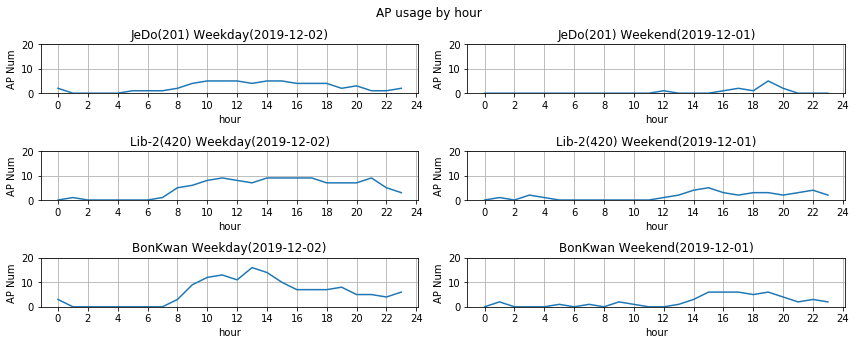

In [212]:
plt.rcParams["figure.figsize"] = (12,5)

xsize = 6
ysize = 4

plt.subplot(321)
plt.rcParams["figure.figsize"] = (xsize,ysize)
plt.ylim(0, 20)
plt.xticks(hour_std)
plt.xlabel('hour')
plt.ylabel('AP Num')
plt.title('JeDo(201) Weekday(2019-12-02)')
plt.plot(hour, l2)
plt.grid()

plt.subplot(322)
plt.rcParams["figure.figsize"] = (xsize,ysize)
plt.ylim(0, 20)
plt.xticks(hour_std)
plt.xlabel('hour')
plt.ylabel('AP Num')
plt.title('JeDo(201) Weekend(2019-12-01)')
plt.plot(hour, l1)
plt.grid()

plt.subplot(323)
plt.rcParams["figure.figsize"] = (xsize,ysize)
plt.ylim(0, 20)
plt.xticks(hour_std)
plt.xlabel('hour')
plt.ylabel('AP Num')
plt.title('Lib-2(420) Weekday(2019-12-02)')
plt.plot(hour, l4)
plt.grid()

plt.subplot(324)
plt.rcParams["figure.figsize"] = (xsize,ysize)
plt.ylim(0, 20)
plt.xticks(hour_std)
plt.xlabel('hour')
plt.ylabel('AP Num')
plt.title('Lib-2(420) Weekend(2019-12-01)')
plt.plot(hour, l5)
plt.grid()


plt.subplot(325)
plt.rcParams["figure.figsize"] = (xsize,ysize)
plt.ylim(0, 20)
plt.xticks(hour_std)
plt.xlabel('hour')
plt.ylabel('AP Num')
plt.title('BonKwan Weekday(2019-12-02)')
plt.plot(hour, l6)
plt.grid()

plt.subplot(326)
plt.rcParams["figure.figsize"] = (xsize,ysize)
plt.ylim(0, 20)
plt.xticks(hour_std)
plt.xlabel('hour')
plt.ylabel('AP Num')
plt.title('BonKwan Weekend(2019-12-01)')
plt.plot(hour, l3)
plt.grid()

plt.suptitle('AP usage by hour')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


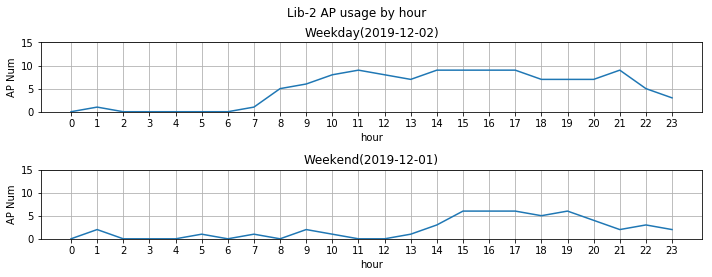

In [141]:
plt.subplot(211)
plt.rcParams["figure.figsize"] = (10,4)
plt.ylim(0, 15)
plt.xticks(hour)
plt.xlabel('hour')
plt.ylabel('AP Num')
plt.title('Weekday(2019-12-02)')
plt.plot(hour, l2)
plt.grid()

plt.subplot(212)
plt.rcParams["figure.figsize"] = (10,4)
plt.ylim(0,15)
plt.xticks(hour)
plt.xlabel('hour')
plt.ylabel('AP Num')
plt.title('Weekend(2019-12-01)')
plt.plot(hour, l1)
plt.grid()

plt.suptitle('Lib-2(420) AP usage by hour')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
